<a href="https://colab.research.google.com/github/KeerthanaKambham/Neural_Networks/blob/main/2_handwritten_digit_recgonition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# -----------------------------
# 1. Train CNN on MNIST
# -----------------------------
print("Loading MNIST...")
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test  = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

print("Training model...")
model.fit(x_train, y_train, epochs=3, batch_size=64, validation_data=(x_test, y_test))


# -----------------------------
# 2. Function to preprocess and predict a digit image
# -----------------------------
def predict_digit(img_path):
    if not os.path.exists(img_path):
        raise ValueError(f"File not found: {img_path}")

    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Could not read image: {img_path}")

    # Resize to 28x28
    img = cv2.resize(img, (28, 28))

    # Invert if white background
    if np.mean(img) > 127:
        img = 255 - img

    # Normalize and reshape
    img = img.astype("float32") / 255.0
    img = img.reshape(1, 28, 28, 1)

    # Predict
    pred = model.predict(img)
    digit = int(tf.argmax(pred, axis=1).numpy()[0])
    return digit


# -----------------------------
# 3. Predict two digits & combine
# -----------------------------
img1 = input("Enter first digit image filename: ")   # e.g. digit5.png
img2 = input("Enter second digit image filename: ")  # e.g. digit6.png

digit1 = predict_digit(img1)
digit2 = predict_digit(img2)

combined_number = int(f"{digit1}{digit2}")

print("\nPredicted first digit :", digit1)
print("Predicted second digit:", digit2)
print("----------------------------------")
print("Final combined output :", combined_number)
print("----------------------------------")


Loading MNIST...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model...
Epoch 1/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 47s 49ms/step - accuracy: 0.8896 - loss: 0.3627 - val_accuracy: 0.9861 - val_loss: 0.0470
Epoch 2/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 46s 49ms/step - accuracy: 0.9835 - loss: 0.0526 - val_accuracy: 0.9873 - val_loss: 0.0389
Epoch 3/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 45s 48ms/step - accuracy: 0.9899 - loss: 0.0331 - val_accuracy: 0.9903 - val_loss: 0.0304
Enter first digit image filename: /content/digit.png.png
Enter second digit image filename: /content/digit2.png.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

Predicted first digit : 8
Predicted second digit: 1
----------------------------------
Final combined output : 81
----------------------------------


Loading MNIST...
Training model...
Epoch 1/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 52s 53ms/step - accuracy: 0.8924 - loss: 0.3602 - val_accuracy: 0.9845 - val_loss: 0.0489
Epoch 2/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 45s 48ms/step - accuracy: 0.9832 - loss: 0.0528 - val_accuracy: 0.9851 - val_loss: 0.0420
Epoch 3/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 46s 49ms/step - accuracy: 0.9900 - loss: 0.0331 - val_accuracy: 0.9889 - val_loss: 0.0314
Enter second digit image filename: /content/digit.png.png


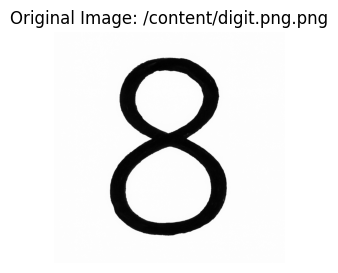

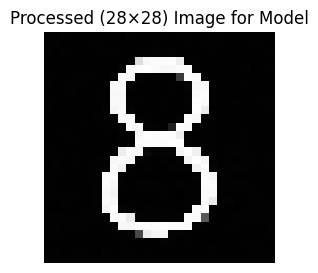

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


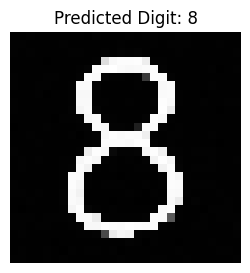

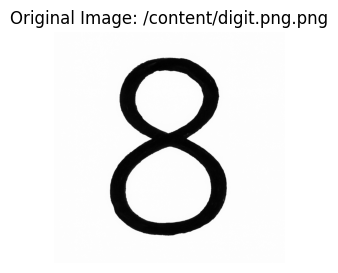

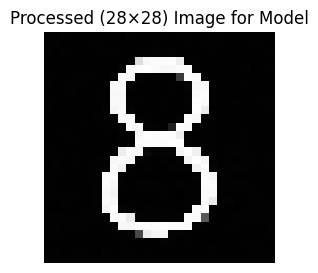

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


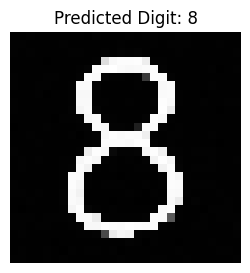


Predicted first digit : 8
Predicted second digit: 8
----------------------------------
Final combined output : 88
----------------------------------


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# -----------------------------
# 1. Train CNN on MNIST
# -----------------------------
print("Loading MNIST...")
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test  = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

print("Training model...")
model.fit(x_train, y_train, epochs=3, batch_size=64, validation_data=(x_test, y_test))


# -----------------------------
# 2. Function to preprocess, predict, and show image
# -----------------------------
def predict_digit(img_path):

    if not os.path.exists(img_path):
        raise ValueError(f"File not found: {img_path}")

    # Read image
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Could not read image: {img_path}")

    # Show the ORIGINAL image
    plt.figure(figsize=(3, 3))
    plt.imshow(img, cmap="gray")
    plt.title(f"Original Image: {img_path}")
    plt.axis("off")
    plt.show()

    # Resize to 28x28
    img_resized = cv2.resize(img, (28, 28))

    # Invert colors if background is white
    if np.mean(img_resized) > 127:
        img_resized = 255 - img_resized

    # Show the PROCESSED image
    plt.figure(figsize=(3, 3))
    plt.imshow(img_resized, cmap="gray")
    plt.title("Processed (28×28) Image for Model")
    plt.axis("off")
    plt.show()

    # Normalize and reshape
    img_norm = img_resized.astype("float32") / 255.0
    img_input = img_norm.reshape(1, 28, 28, 1)

    # Predict digit
    pred = model.predict(img_input)
    digit = int(tf.argmax(pred, axis=1).numpy()[0])

    # Show final PREDICTION as an image
    plt.figure(figsize=(3, 3))
    plt.imshow(img_norm.reshape(28, 28), cmap="gray")
    plt.title(f"Predicted Digit: {digit}")
    plt.axis("off")
    plt.show()

    return digit


# -----------------------------
# 3. Predict two digits & combine
# -----------------------------
img1 = input("Enter first digit image filename: ")   # e.g. 5.png
img2 = input("Enter second digit image filename: ")  # e.g. 6.png

digit1 = predict_digit(img1)
digit2 = predict_digit(img2)

combined_number = int(f"{digit1}{digit2}")

print("\nPredicted first digit :", digit1)
print("Predicted second digit:", digit2)
print("----------------------------------")
print("Final combined output :", combined_number)
print("----------------------------------")

Current working directory: /content
Files in this directory: ['.config', 'sample_data']
--------------------------------------------------
Loading MNIST...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model...
Epoch 1/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 47s 49ms/step - accuracy: 0.8967 - loss: 0.3431 - val_accuracy: 0.9847 - val_loss: 0.0473
Epoch 2/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 49ms/step - accuracy: 0.9847 - loss: 0.0490 - val_accuracy: 0.9883 - val_loss: 0.0338
Epoch 3/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 46s 49ms/step - accuracy: 0.9889 - loss: 0.0347 - val_accuracy: 0.9897 - val_loss: 0.0303
Test accuracy on MNIST: 0.9897000193595886
--------------------------------------------------
Enter path to your 2-digit image (e.g. two_digits.png): /content/ChatGPT Image Dec 6, 2025, 09_09_57 AM.png
Original image shape: (1024, 1536)


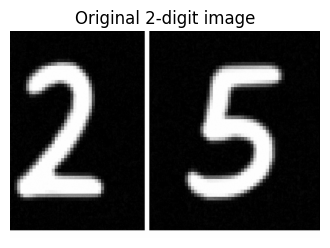

Left digit shape: (1024, 768)
Right digit shape: (1024, 768)


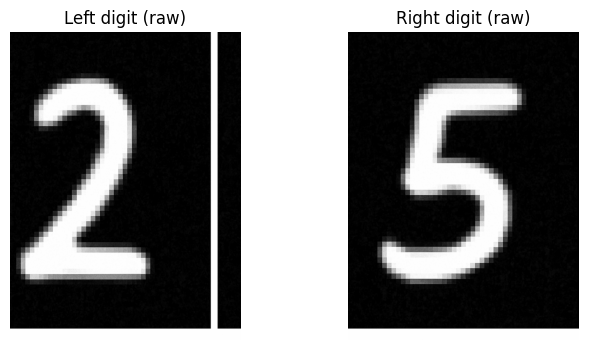

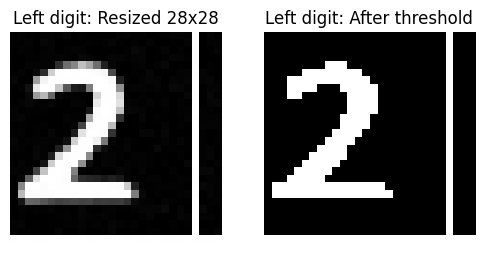

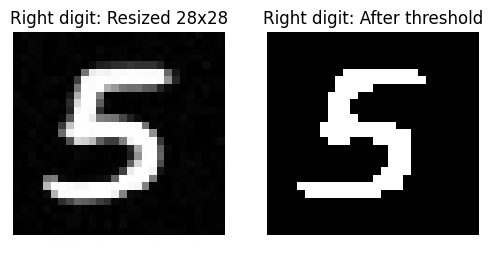

Left final input shape: (1, 28, 28, 1)
Right final input shape: (1, 28, 28, 1)
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted LEFT digit : 2
Predicted RIGHT digit: 5
Predicted 2-digit number: 25


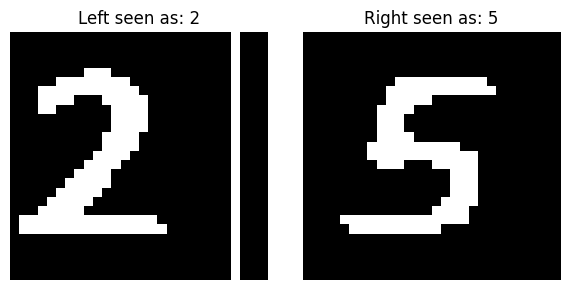

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# -----------------------------
# 0. Helper: show current folder and files
# -----------------------------
print("Current working directory:", os.getcwd())
print("Files in this directory:", os.listdir())
print("--------------------------------------------------")

# -----------------------------
# 1. Load & Train CNN on MNIST (single digit model)
# -----------------------------
print("Loading MNIST...")
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess: reshape and normalize
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test  = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# Build CNN model (for single digit 0–9)
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")  # 10 digits: 0–9
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

print("Training model...")
model.fit(
    x_train, y_train,
    epochs=3,           # you can increase to 5–10 for better accuracy
    batch_size=64,
    validation_data=(x_test, y_test)
)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy on MNIST:", test_acc)
print("--------------------------------------------------")

# -----------------------------
# 2. Ask user for 2-digit image path
# -----------------------------
# Example:
#   - If image is in same folder: two_digits.png
#   - Full path example: C:/Users/YourName/Desktop/two_digits.png
img_path = input("Enter path to your 2-digit image (e.g. two_digits.png): ").strip()

if not os.path.exists(img_path):
    print("❌ File does not exist at path:", img_path)
    print("Make sure the file is in this folder or give full path.")
    raise SystemExit

# -----------------------------
# 3. Load image with OpenCV (grayscale)
# -----------------------------
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
if img is None:
    print("❌ cv2 could not read the image. Check the file type or path.")
    raise SystemExit

print("Original image shape:", img.shape)

plt.figure(figsize=(4, 4))
plt.imshow(img, cmap="gray")
plt.title("Original 2-digit image")
plt.axis("off")
plt.show()

# -----------------------------
# 4. Split image into left and right digits
# -----------------------------
h, w = img.shape
mid = w // 2   # simple split in the middle

left_img  = img[:, :mid]
right_img = img[:, mid:]

print("Left digit shape:", left_img.shape)
print("Right digit shape:", right_img.shape)

# Show the split images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(left_img, cmap="gray")
plt.title("Left digit (raw)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(right_img, cmap="gray")
plt.title("Right digit (raw)")
plt.axis("off")
plt.show()

# -----------------------------
# 5. Function: preprocess one digit image like MNIST
# -----------------------------
def preprocess_digit(img_digit, title_prefix="Digit"):
    # Step 1: Resize to 28x28
    img_resized = cv2.resize(img_digit, (28, 28))

    # Step 2: Invert colors if background is white (MNIST uses black digit on white bg)
    if np.mean(img_resized) > 127:
        print(f"{title_prefix}: Image seems to have white background → inverting colors")
        img_resized = 255 - img_resized

    # Step 3: Threshold to clean noise
    _, img_thresh = cv2.threshold(
        img_resized, 0, 255,
        cv2.THRESH_BINARY + cv2.THRESH_OTSU
    )

    # Step 4: Normalize to [0, 1]
    img_norm = img_thresh.astype("float32") / 255.0

    # Step 5: Reshape to (1, 28, 28, 1) for CNN
    img_input = img_norm.reshape(1, 28, 28, 1)

    # Show intermediate
    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plt.imshow(img_resized, cmap="gray")
    plt.title(f"{title_prefix}: Resized 28x28")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(img_norm.reshape(28, 28), cmap="gray")
    plt.title(f"{title_prefix}: After threshold")
    plt.axis("off")
    plt.show()

    return img_input, img_norm

# Preprocess left and right digit
left_input, left_norm   = preprocess_digit(left_img,  title_prefix="Left digit")
right_input, right_norm = preprocess_digit(right_img, title_prefix="Right digit")

print("Left final input shape:", left_input.shape)
print("Right final input shape:", right_input.shape)
print("--------------------------------------------------")

# -----------------------------
# 6. Predict each digit
# -----------------------------
pred_left  = model.predict(left_input)
pred_right = model.predict(right_input)

left_digit  = int(tf.argmax(pred_left, axis=1).numpy()[0])
right_digit = int(tf.argmax(pred_right, axis=1).numpy()[0])

print("Predicted LEFT digit :", left_digit)
print("Predicted RIGHT digit:", right_digit)

full_number_str = f"{left_digit}{right_digit}"
print("Predicted 2-digit number:", full_number_str)

# Show what model sees
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.imshow(left_norm.reshape(28, 28), cmap="gray")
plt.title(f"Left seen as: {left_digit}")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(right_norm.reshape(28, 28), cmap="gray")
plt.title(f"Right seen as: {right_digit}")
plt.axis("off")

plt.tight_layout()
plt.show()

Loading MNIST...
Training model...
Epoch 1/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 48s 50ms/step - accuracy: 0.8913 - loss: 0.3724 - val_accuracy: 0.9831 - val_loss: 0.0547
Epoch 2/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 46s 49ms/step - accuracy: 0.9836 - loss: 0.0517 - val_accuracy: 0.9878 - val_loss: 0.0353
Epoch 3/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 50ms/step - accuracy: 0.9896 - loss: 0.0344 - val_accuracy: 0.9883 - val_loss: 0.0347
Enter first digit image filename: /content/digit.png.png
Enter second digit image filename: /content/digit2.png.png


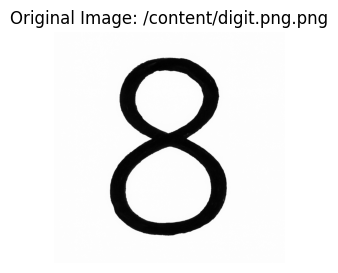

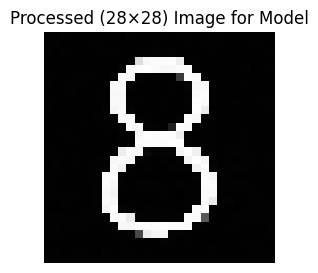

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


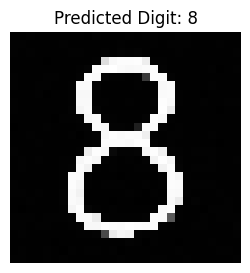

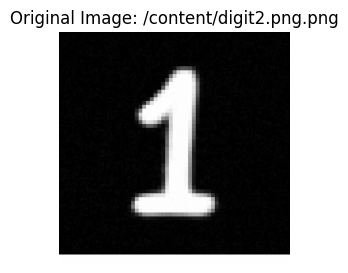

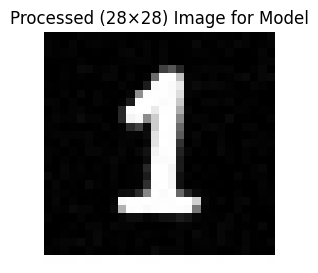

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


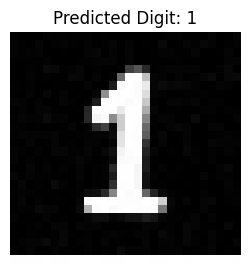


Predicted first digit : 8
Predicted second digit: 1
----------------------------------
Final combined output : 81
----------------------------------


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# -----------------------------
# 1. Train CNN on MNIST
# -----------------------------
print("Loading MNIST...")
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test  = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

print("Training model...")
model.fit(x_train, y_train, epochs=3, batch_size=64, validation_data=(x_test, y_test))


# -----------------------------
# 2. Function to preprocess, predict, and show image
# -----------------------------
def predict_digit(img_path):

    if not os.path.exists(img_path):
        raise ValueError(f"File not found: {img_path}")

    # Read image
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Could not read image: {img_path}")

    # Show the ORIGINAL image
    plt.figure(figsize=(3, 3))
    plt.imshow(img, cmap="gray")
    plt.title(f"Original Image: {img_path}")
    plt.axis("off")
    plt.show()

    # Resize to 28x28
    img_resized = cv2.resize(img, (28, 28))

    # Invert colors if background is white
    if np.mean(img_resized) > 127:
        img_resized = 255 - img_resized

    # Show the PROCESSED image
    plt.figure(figsize=(3, 3))
    plt.imshow(img_resized, cmap="gray")
    plt.title("Processed (28×28) Image for Model")
    plt.axis("off")
    plt.show()

    # Normalize and reshape
    img_norm = img_resized.astype("float32") / 255.0
    img_input = img_norm.reshape(1, 28, 28, 1)

    # Predict digit
    pred = model.predict(img_input)
    digit = int(tf.argmax(pred, axis=1).numpy()[0])

    # Show final PREDICTION as an image
    plt.figure(figsize=(3, 3))
    plt.imshow(img_norm.reshape(28, 28), cmap="gray")
    plt.title(f"Predicted Digit: {digit}")
    plt.axis("off")
    plt.show()

    return digit


# -----------------------------
# 3. Predict two digits & combine
# -----------------------------
img1 = input("Enter first digit image filename: ")   # e.g. 5.png
img2 = input("Enter second digit image filename: ")  # e.g. 6.png

digit1 = predict_digit(img1)
digit2 = predict_digit(img2)

combined_number = int(f"{digit1}{digit2}")

print("\nPredicted first digit :", digit1)
print("Predicted second digit:", digit2)
print("----------------------------------")
print("Final combined output :", combined_number)
print("----------------------------------")